In [ ]:
# analisis
import pandas as pd
import numpy as np

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster
import folium
import ipywidgets as widgets
from IPython.display import display

# clustering o predicciones
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_eoap = pd.read_csv('combined_eoap.csv')
df_eoh = pd.read_csv('combined_eoh.csv')
df_extended = pd.read_csv('extended.csv')
df_monthly = pd.read_csv('monthly.csv')
df_proc_ext = pd.read_csv('processed_extended.csv')
df_proc_mon = pd.read_csv('processed_monthly.csv')

<ipython-input-2-27e7cd6813c5>:3: DtypeWarning: Columns (51,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_extended = pd.read_csv('extended.csv')
<ipython-input-2-27e7cd6813c5>:4: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_monthly = pd.read_csv('monthly.csv')
<ipython-input-2-27e7cd6813c5>:5: DtypeWarning: Columns (48,56,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_proc_ext = pd.read_csv('processed_extended.csv')
<ipython-input-2-27e7cd6813c5>:6: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_proc_mon = pd.read_csv('processed_monthly.csv')


In [ ]:
df_eoap.head(5)

,Mes_Num;Mes;estancia_media_eoap;pernoctaciones_eoap;ocupacion_plazas_eoap;ocupacion_plazas_finde_eoap;ocupacion_apartamentos_eoap;ocupacion_apartamentos_finde_eoap;numero_apartamentos_eoap;numero_plazas_eoap;numero_establecimientos_eoap;viajeros_eoap
0,0;Media total;13.445;37.893499999999996;14.858...
1,1;Enero;13.34;10.239;7.2;7.44;15.15;16.43;1.05...
2,2;Febrero;12.89;12.712;9.89;9.75;18.07;17.91;1...
3,3;Marzo;14.94;16.709;11.22;11.99;22.89;23.16;1...
4,4;Abril;13.77;35.913;9.11;8.99;14.47;14.14;3.5...


In [ ]:
df_eoh.head(5)

,Mes_Num;Mes;estancia_media_eoh;numero_plazas_eoh;ocupacion_plazas_eoh;ocupacion_habitaciones_eoh;ocupacion_plazas_finde_eoh;numero_establecimientos_eoh;viajeros_eoh;habitaciones_eoh;personal_eoh
0,0;Media total;1.7833333333333332;0.96583333333...
1,1;Enero;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0
2,2;Febrero;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0
3,3;Marzo;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0
4,4;Abril;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0


In [ ]:
df_monthly.head(5)

,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),...,Metropolitan Statistical Area,Latitude,Longitude,Active,Scraped During Month,Currency Native,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager
0,ab-295403,Entire apartment,Entire home/apt,2,2016-06-01,0.0,0.0,0.0,NaN,NaN,...,NaN,38.095559,-0.656122,False,True,EUR,295403.0,1524447.0,NaN,NaN
1,ab-295403,Entire apartment,Entire home/apt,2,2016-07-01,0.0,0.0,0.0,NaN,NaN,...,NaN,38.095559,-0.656122,False,True,EUR,295403.0,1524447.0,NaN,NaN
2,ab-295403,Entire apartment,Entire home/apt,2,2016-08-01,0.0,0.0,0.0,NaN,NaN,...,NaN,38.095559,-0.656122,False,False,EUR,295403.0,1524447.0,NaN,NaN
3,ab-295403,Entire apartment,Entire home/apt,2,2016-09-01,0.0,0.0,0.0,NaN,NaN,...,NaN,38.095559,-0.656122,False,False,EUR,295403.0,1524447.0,NaN,NaN
4,ab-295403,Entire apartment,Entire home/apt,2,2016-10-01,0.0,0.0,0.0,NaN,NaN,...,NaN,38.095559,-0.656122,True,True,EUR,295403.0,1524447.0,NaN,NaN


In [ ]:
df_extended.head(5)

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
0,ab-295403,A top floor apartment by the sea,Entire apartment,Entire home/apt,2011-12-24,2017-12-19,Spain,NaN,Guardamar del Segura,NaN,...,NaN,"[""kitchen"", ""tv"", ""heating"", ""ac"", ""washer"", ""...",NaN,NaN,NaN,NaN,295403.0,1524447.0,NaN,NaN
1,ab-484366,Beach house 300m from the sea Spain,Home,Entire home/apt,2012-05-16,2023-11-15,Spain,Alicante,Guardamar del Segura,NaN,...,NaN,"[""free_parking"", ""wireless_internet"", ""firepla...",NaN,False,NaN,NaN,484366.0,2397719.0,1204376a,NaN
2,ab-608855,Ven a tomar el sol al Mediterráneo,Apartment,Entire home/apt,2012-07-21,2021-02-09,Spain,Alicante,Guardamar del Segura,NaN,...,NaN,"[""elevator"", ""free_parking"", ""wireless_interne...",NaN,False,NaN,VT-460933-A,608855.0,2760935.0,NaN,NaN
3,ab-627895,NICE APARTMENT IN GUARDAMAR,Rental unit,Entire home/apt,2012-07-30,2023-01-16,Spain,Alicante,Guardamar del Segura,NaN,...,NaN,"[""elevator"", ""kitchen"", ""hangers"", ""iron"", ""wa...",NaN,False,NaN,NaN,627895.0,3086177.0,NaN,NaN
4,ab-719745,Holiday House for rent 150m from Alicante beach,Chalet,Entire home/apt,2012-09-29,2023-11-19,Spain,Alicante,Guardamar del Segura,NaN,...,NaN,"[""fireplace"", ""kitchen"", ""ac"", ""heating"", ""hai...",NaN,False,NaN,NaN,719745.0,2397719.0,NaN,NaN


In [ ]:
df_proc_ext.head(5)

,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Currency Native,...,Airbnb Property ID,distancia_ayuntamiento_km,distancia_playa_km,Dist_POI_m,N_POI_2km,Dist_Supermercado_m,N_Supermercado_2km,Dist_ParadaBus_m,N_ParadaBus_2km,N_Restaurante_2km
0,ab-295403,A top floor apartment by the sea,Entire apartment,Entire home/apt,2011-12-24,2017-12-19,Spain,NaN,Guardamar del Segura,EUR,...,295403.0,0.633652,1.419984,165.890603,20,335.758591,4,150.928478,31,60
1,ab-484366,Beach house 300m from the sea Spain,Home,Entire home/apt,2012-05-16,2023-11-15,Spain,Alicante,Guardamar del Segura,EUR,...,484366.0,2.947033,1.779121,232.151642,2,1112.385796,1,280.114597,12,11
2,ab-608855,Ven a tomar el sol al Mediterráneo,Apartment,Entire home/apt,2012-07-21,2021-02-09,Spain,Alicante,Guardamar del Segura,EUR,...,608855.0,0.917645,0.492796,181.470751,18,467.356195,4,205.049253,36,62
3,ab-627895,NICE APARTMENT IN GUARDAMAR,Rental unit,Entire home/apt,2012-07-30,2023-01-16,Spain,Alicante,Guardamar del Segura,EUR,...,627895.0,0.648818,1.301571,66.772207,20,372.512351,4,27.700023,31,60
4,ab-719745,Holiday House for rent 150m from Alicante beach,Chalet,Entire home/apt,2012-09-29,2023-11-19,Spain,Alicante,Guardamar del Segura,EUR,...,719745.0,3.011823,1.871667,109.305247,2,991.366339,1,348.594628,12,9


In [ ]:
df_proc_mon.head(5)

,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),...,Country,State,City,Latitude,Longitude,Active,Scraped During Month,Currency Native,Airbnb Property ID,HomeAway Property Manager
0,ab-295403,Entire apartment,Entire home/apt,2,2016-06-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,True,EUR,295403.0,NaN
1,ab-295403,Entire apartment,Entire home/apt,2,2016-07-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,True,EUR,295403.0,NaN
2,ab-295403,Entire apartment,Entire home/apt,2,2016-08-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,False,EUR,295403.0,NaN
3,ab-295403,Entire apartment,Entire home/apt,2,2016-09-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,False,EUR,295403.0,NaN
4,ab-295403,Entire apartment,Entire home/apt,2,2016-10-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,True,True,EUR,295403.0,NaN


In [ ]:
df_proc_mon['Reporting Month'] = pd.to_datetime(df_proc_mon['Reporting Month'])

df_proc_mon = df_proc_mon.dropna(subset=['Latitude', 'Longitude', 'ADR (USD)'])

df_proc_mon = df_proc_mon[df_proc_mon['Active'] == True]

print("Ciudades únicas:", df_proc_mon['City'].unique())

Ciudades únicas: ['Guardamar del Segura' 'Los Montesinos' 'Orihuela' 'Pilar de la Horadada'
 'Rojales' 'San Miguel de Salinas' 'Torrevieja']


## Visualizaciones

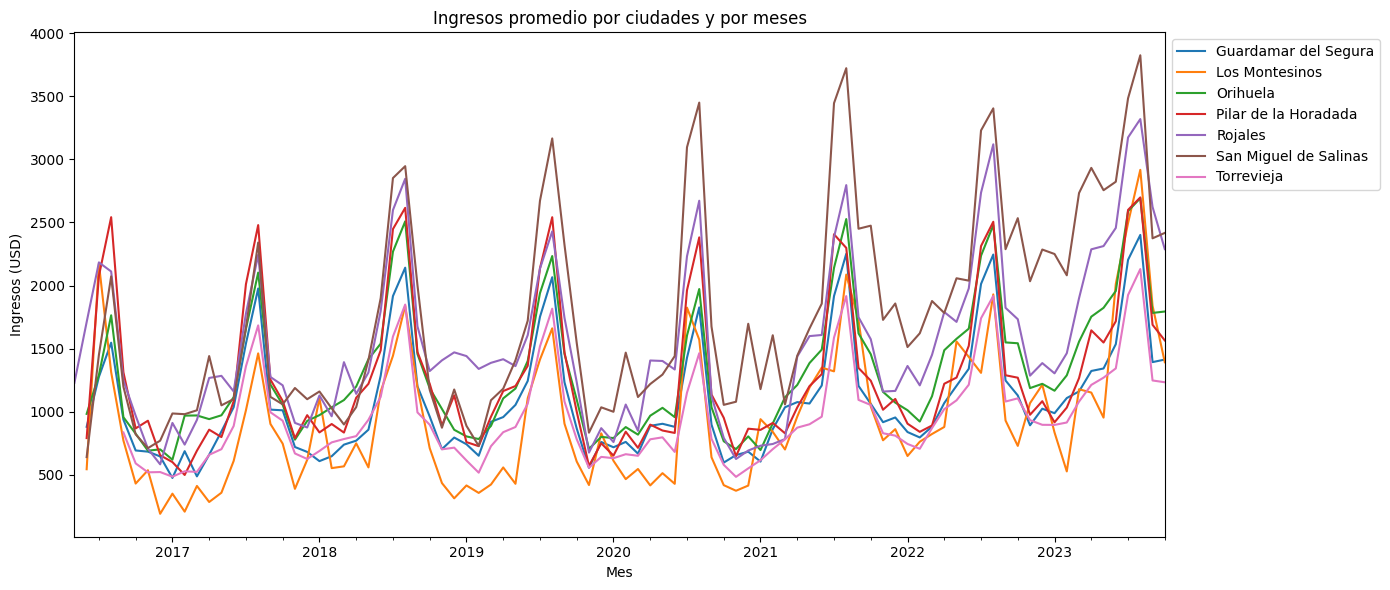

In [ ]:
# Ingresos promedio por ciudades y por meses
revenue_by_month = df_proc_mon.groupby(['Reporting Month', 'City'])['Revenue (USD)'].mean().unstack()

revenue_by_month.plot(figsize=(14, 6))
plt.title('Ingresos promedio por ciudades y por meses')
plt.ylabel('Ingresos (USD)')
plt.xlabel('Mes')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

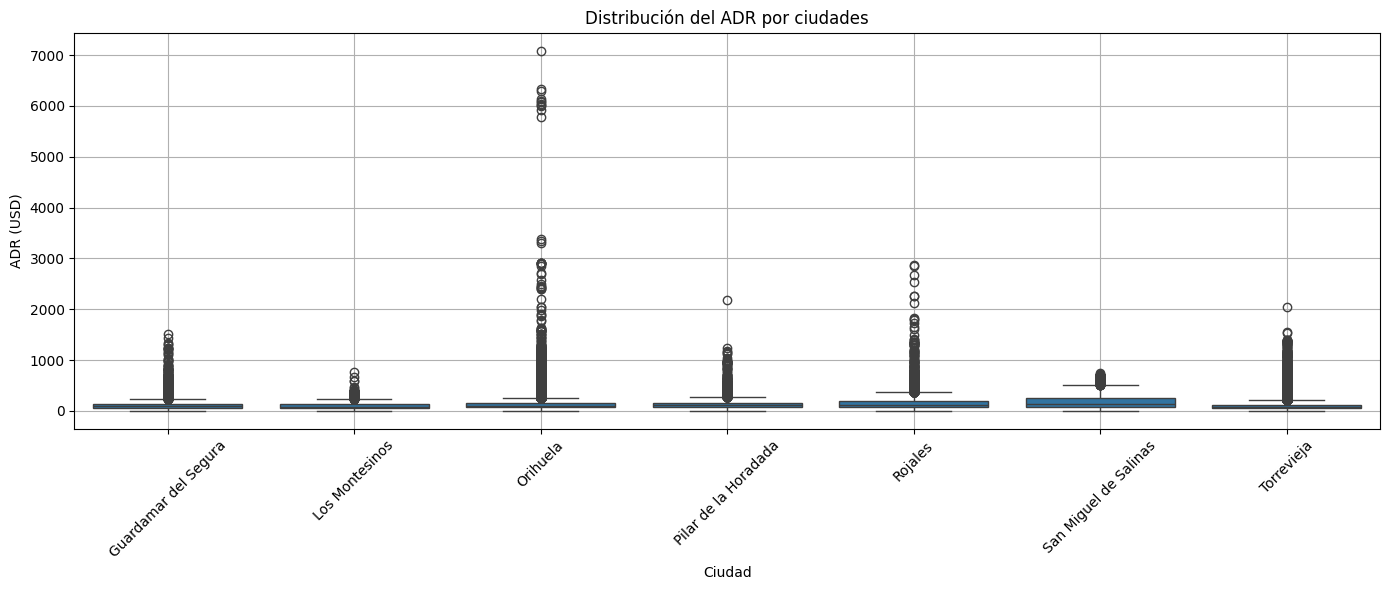

In [ ]:
# Distribución del ADR
df_box = df_proc_mon[df_proc_mon['ADR (USD)'] > 0]

plt.figure(figsize=(14,6))
sns.boxplot(x='City', y='ADR (USD)', data=df_box)
plt.xticks(rotation=45)
plt.title('Distribución del ADR por ciudades')
plt.ylabel('ADR (USD)')
plt.xlabel('Ciudad')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ocupación promedio por meses por tipo
df_filtered = df_proc_mon[df_proc_mon['Occupancy Rate'].notnull() & df_proc_mon['Property Type'].notnull()]

property_types = sorted(df_filtered['Property Type'].unique())

dropdown = widgets.Dropdown(
    options=property_types,
    description='Tipo:',
    value=property_types[0]
)

def plot_occupancy(property_type):
    subset = df_filtered[df_filtered['Property Type'] == property_type]
    grouped = subset.groupby('Reporting Month')['Occupancy Rate'].mean()

    plt.figure(figsize=(12,5))
    grouped.plot(marker='o', linestyle='-')
    plt.title(f'Ocupación promedio por meses — {property_type}')
    plt.xlabel('Mes')
    plt.ylabel('Occupancy Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

widgets.interact(plot_occupancy, property_type=dropdown);

interactive(children=(Dropdown(description='Tipo:', options=('Apartment', 'Bed & Breakfast', 'Bed & breakfast'…

<ipython-input-13-361be9ed4ed2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, palette='viridis')


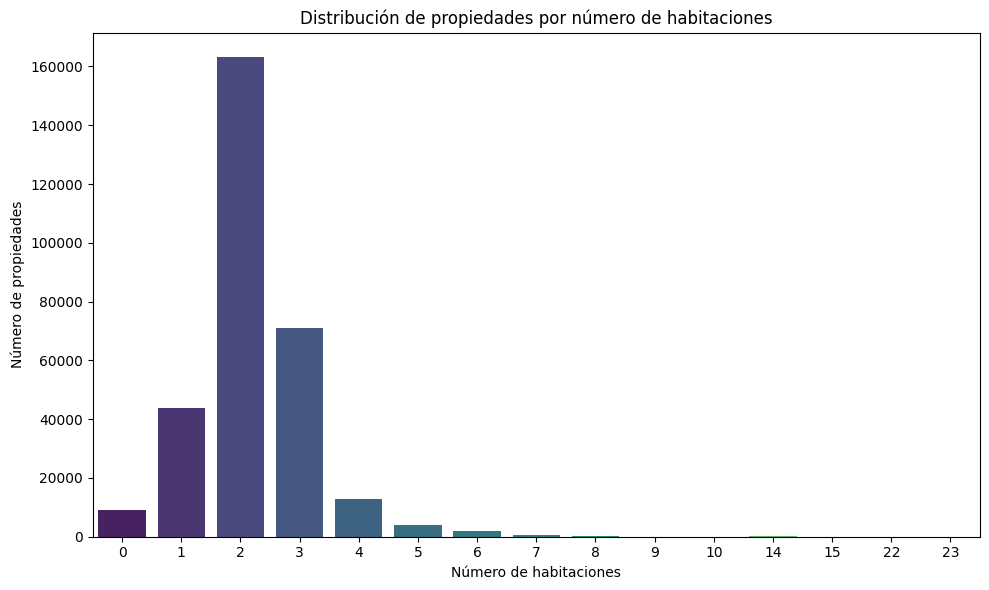

In [ ]:
# Por cantidad de habitaciones
bedroom_counts = df_proc_mon['Bedrooms'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, palette='viridis')
plt.title('Distribución de propiedades por número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Número de propiedades')
plt.tight_layout()
plt.show()

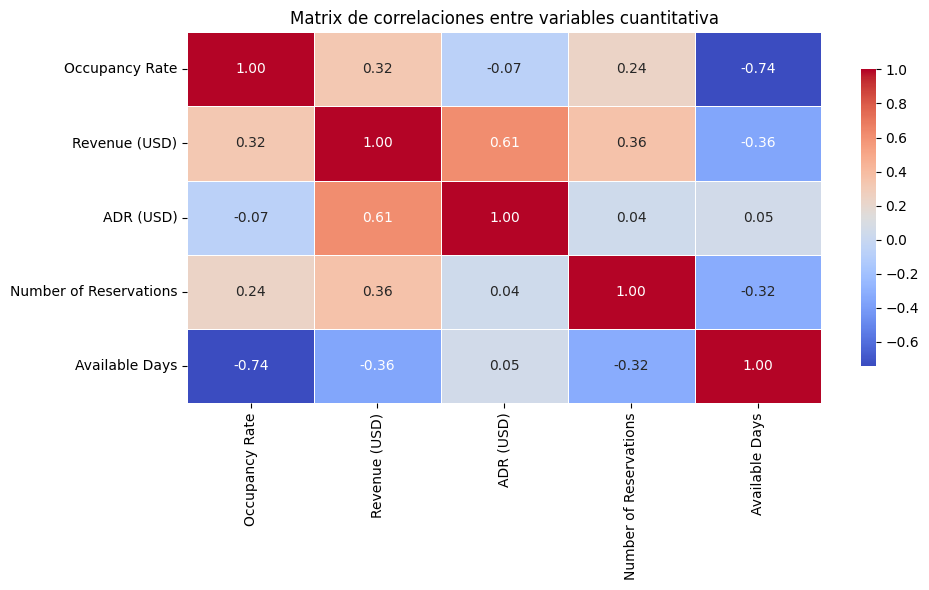

In [ ]:
# Matrix de correlaciones
num_cols = ['Occupancy Rate', 'Revenue (USD)', 'ADR (USD)', 'Number of Reservations', 'Available Days']

corr_matrix = df_proc_mon[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Matrix de correlaciones entre variables cuantitativa')
plt.tight_layout()
plt.show()

In [ ]:
# Datos de vivenda con precio
center_lat = df_proc_mon['Latitude'].mean()
center_lon = df_proc_mon['Longitude'].mean()
mapa = folium.Map(location=[center_lat, center_lon], zoom_start=7)

marker_cluster = MarkerCluster().add_to(mapa)

for _, row in df_proc_mon.iterrows():
    tooltip = f"{row['City']} | ADR: ${row['ADR (USD)']:.2f}"
    color = (
        'green' if row['ADR (USD)'] < 50 else
        'orange' if row['ADR (USD)'] < 100 else
        'red'
    )
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=tooltip,
        color='blue',
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(marker_cluster)

mapa

In [ ]:
# Bubble-chart con folium para mean valor de ADR por cada ciudad
df_geo = df_proc_mon.dropna(subset=['Latitude', 'Longitude'])

city_group = df_geo.groupby('City').agg({'ADR (USD)': 'mean', 'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()

m = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in city_group.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['City']}: {row['ADR (USD)']:.2f} USD"
    ).add_to(marker_cluster)

m

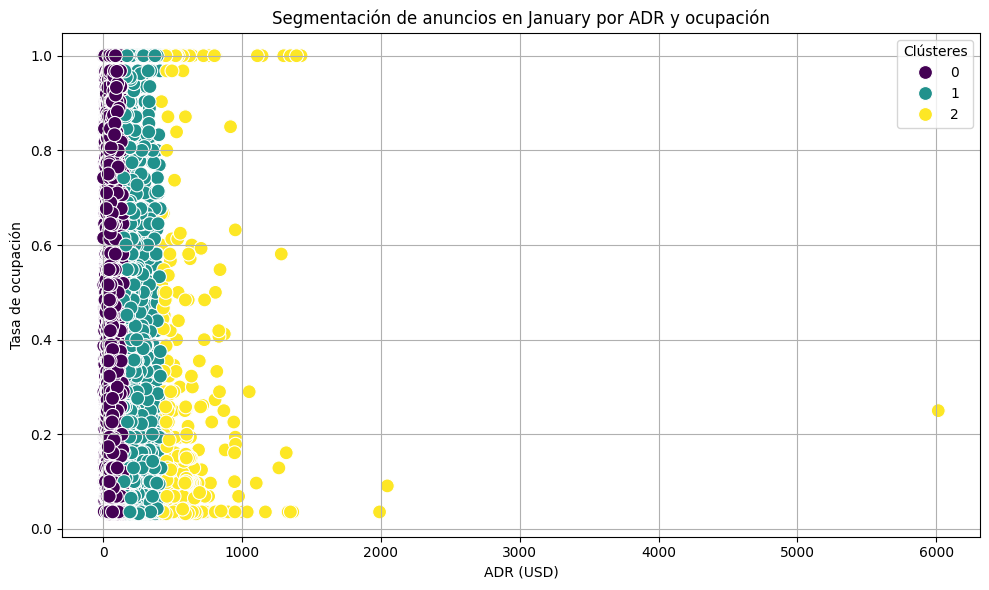

In [ ]:
# Grafico de clustering por mes
df_clustering = df_proc_mon[['ADR (USD)', 'Occupancy Rate', 'Reporting Month']].dropna()

df_clustering['Reporting Month'] = pd.to_datetime(df_clustering['Reporting Month'], format='%Y-%m-%d')

def plot_clusters_by_month(month):
    df_filtered = df_clustering[df_clustering['Reporting Month'].dt.month_name() == month]

    kmeans = KMeans(n_clusters=3, random_state=42)
    df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[['ADR (USD)', 'Occupancy Rate']])

    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_filtered, x='ADR (USD)', y='Occupancy Rate', hue='Cluster', palette='viridis', s=100)
    plt.title(f'Segmentación de anuncios en {month} por ADR y ocupación')
    plt.xlabel('ADR (USD)')
    plt.ylabel('Tasa de ocupación')
    plt.legend(title='Clústeres')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

month_widget = widgets.Dropdown(
    options=df_clustering['Reporting Month'].dt.month_name().unique(),
    description='Mes:',
    value='January'
)

widgets.interact(plot_clusters_by_month, month=month_widget);

## Analisis predictivo

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

le = LabelEncoder()
df_proc_mon['Property Type'] = le.fit_transform(df_proc_mon['Property Type'].astype(str))
df_proc_mon['City'] = le.fit_transform(df_proc_mon['City'].astype(str))

# Заполним пропущенные значения медианой для числовых переменных
df_proc_mon['Occupancy Rate'] = df_proc_mon['Occupancy Rate'].fillna(df_proc_mon['Occupancy Rate'].median())

# Отберём признаки для модели
features = ['Property Type', 'Bedrooms', 'ADR (USD)', 'Number of Reservations', 'Available Days', 'Blocked Days', 'City']
X = df_proc_mon[features]
y = df_proc_mon['Occupancy Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 0.03833090619299407
R2: 0.6396833696187225


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Предполагаем, что данные уже загружены в df
# Преобразуем категориальные переменные в числовые
le = LabelEncoder()
df_proc_mon['Property Type'] = le.fit_transform(df_proc_mon['Property Type'].astype(str))
df_proc_mon['City'] = le.fit_transform(df_proc_mon['City'].astype(str))

# Заполним пропущенные значения медианой для числовых переменных
df_proc_mon['Occupancy Rate'] = df_proc_mon['Occupancy Rate'].fillna(df_proc_mon['Occupancy Rate'].median())

# Отберём признаки для модели
features = ['Property Type', 'Bedrooms', 'ADR (USD)', 'Number of Reservations', 'Available Days', 'Blocked Days', 'City']
X = df_proc_mon[features]
y = df_proc_mon['Occupancy Rate']

# Разделим данные на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозируем значения на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 0.04507827685964042
R2 Score: 0.5762570094304562
